<a href="https://colab.research.google.com/github/Saimani5454/linear_regression/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np

In [4]:
#Load the data set
claimants=pd.read_csv("claimants.csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [5]:
#dropping the case number columns as it is no required
claimants.drop(['CASENUM'],inplace=True,axis=1)


In [6]:
#shape of the data set
claimants.shape

(1340, 6)

In [7]:
#Removing NA values in data set
claimants=claimants.dropna()
claimants.shape

(1096, 6)

In [8]:
#Dividing our data into input and output variables
X=claimants.iloc[:,1:]
Y=claimants.iloc[:,0]

In [9]:
#Logistic regression and fit the model
classifier=LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [10]:
#Predict for X dataset
y_pred=classifier.predict(X)

In [14]:
y_pred_df=pd.DataFrame({"actual":Y,"predicted_prob":classifier.predict(X)})
y_pred_df

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [16]:
#confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[381 197]
 [123 395]]


In [17]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



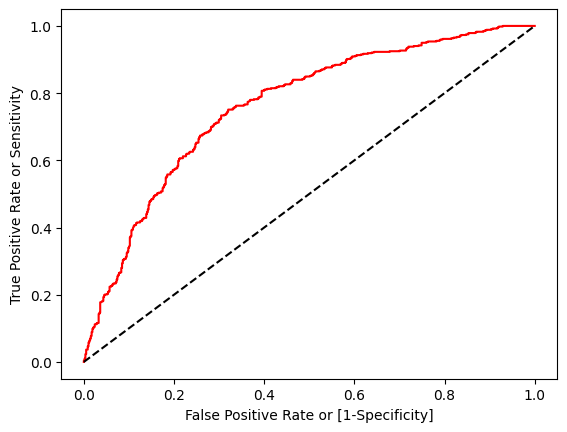

In [22]:
#ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,threshold=roc_curve(Y,classifier.predict_proba(X)[:,1])
auc=roc_auc_score(Y,y_pred)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red',label='logit model(area=%0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1-Specificity]')
plt.ylabel('True Positive Rate or Sensitivity')
plt.show()